In [21]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

os.chdir('D:\Some Python\car analysis')

In [36]:
cardata = pd.read_csv('EPA_emission vehicle_1975_2018.csv')

In [37]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4995 entries, 0 to 4994
Data columns (total 46 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Manufacturer                                         4995 non-null   object
 1   Regulatory Class                                     4995 non-null   object
 2   Vehicle Type                                         4995 non-null   object
 3   Model Year                                           4995 non-null   object
 4   2-Cycle MPG                                          4995 non-null   object
 5   Real-World MPG                                       4995 non-null   object
 6   Real-World MPG_City                                  4995 non-null   object
 7   Real-World MPG_Hwy                                   4995 non-null   object
 8   Real-World CO2 (g/mi)                                4995 non-null   object
 9

In [38]:
cardata['Manufacturer'].value_counts()

Mazda       360
VW          360
Toyota      360
GM          360
Honda       360
FCA         360
All         360
Ford        360
Nissan      360
Kia         315
Subaru      315
Mercedes    315
Hyundai     270
BMW         270
Tesla       270
Name: Manufacturer, dtype: int64

In [51]:
zone = []
for i in cardata['Manufacturer']:
    
    if i == 'GM' or i == 'Ford' : #or i == 'Tesla'. Deleted tesla because since its 100% electric, it modifies the USA values
        zone.append('USA')
    elif i == 'Honda' or  i == 'Toyota' or  i == 'Nissan' or  i == 'Mazda' or  i == 'Subaru':
        zone.append('JAP')
    elif i =='Kia' or i =='Hyundai':
        zone.append ('KOR')
    elif i == 'FCA' or i =='BMW' or i =='Mercedes' or i=='VW':
        zone.append ('EUR')
    else:
        zone.append ('ALL')

In [52]:
cardata.replace('-', np.nan, inplace = True)

In [53]:
cardata['Real-World MPG'] = pd.to_numeric(cardata['Real-World MPG'])
cardata['Engine Displacement'] = pd.to_numeric(cardata['Engine Displacement'])
cardata['Zone'] = zone
cardata['Consumption KPG'] = cardata['Real-World MPG'] * 1.609
cardata['Engine Displacement cm3'] = cardata['Engine Displacement'] * 16.3871

In [45]:
cardata.sample(5)

,Manufacturer,Regulatory Class,Vehicle Type,Model Year,2-Cycle MPG,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),Real-World CO2_City (g/mi),...,Turbocharged Engine,Stop/Start,Cylinder Deactivation,Multivalve Engine,Variable Valve Timing,7+ Gears,Average Number of Gears,Zone,Consumption KPG,Engine Displacement cm3
2807,Subaru,Truck,All Truck,1980,26.01602,22.19262,20.05491,25.51700,400.44834,443.13343,...,0.000,0.000,0.000,NaN,0.000,0.000,4.0,JAP,35.707926,1589.548700
4781,All,Truck,Minivan/Van,1982,17.32255,14.72404,13.89743,15.87836,604.50911,640.35993,...,0.000,0.000,0.000,NaN,0.000,0.000,3.1,ALL,23.690980,4700.819893
2950,Kia,Car,Car SUV,1988,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KOR,NaN,NaN
2125,VW,Truck,Minivan/Van,2018,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUR,NaN,NaN
1777,GM,Truck,Pickup,2004,19.98831,16.05271,13.99213,18.11174,553.61361,635.14268,...,0.000,0.000,0.000,0.133,0.133,0.000,4.0,USA,25.828810,4949.068071


In [46]:
region = pd.pivot_table(cardata, index = 'Model Year', columns = 'Zone', values = 'Consumption KPG')
region.reset_index(inplace = True)
region.sample(5)

Zone,Model Year,ALL,EUR,JAP,KOR,USA
13,1988,32.227894,31.605012,37.633933,46.165669,31.176128
30,2005,31.279431,30.080639,33.956931,32.721010,30.241317
17,1992,30.879427,31.985268,34.473988,41.422112,30.146328
18,1993,30.964921,31.308678,34.473428,41.626495,30.740495
21,1996,31.009728,32.513638,34.390990,37.129858,30.564242


In [47]:
cons = pd.pivot_table(cardata, index = 'Model Year', columns = 'Zone', values = 'Engine Displacement cm3')
cons.reset_index(inplace = True)
cons.sample(5)

Zone,Model Year,ALL,EUR,JAP,KOR,USA
38,2013,3179.078145,3053.111081,2770.819586,2338.486556,3389.977152
14,1989,3432.215619,2927.244836,2193.186815,1614.158847,3751.869151
15,1990,3409.732518,2970.416220,2326.551653,1695.653534,3771.686584
1,1976,4974.175157,3485.727382,2006.297447,NaN,5263.712517
6,1981,3959.025857,2774.128979,1989.357479,NaN,4212.985875


In [48]:
x_axis = region['Model Year']

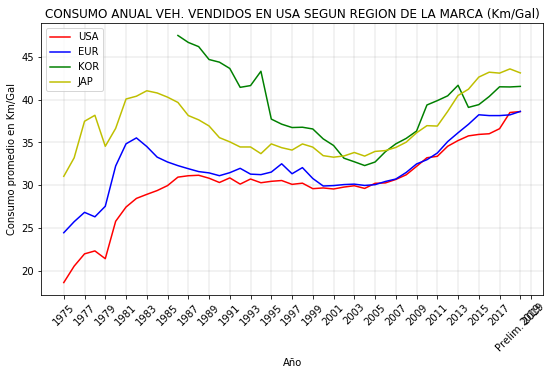

In [49]:
plt.figure(figsize=(9,5))

#plt.plot(x_axis, pivot['ALL'], 'k.-', label = 'ALL')
plt.plot(x_axis, region['USA'], 'r-', label = 'USA')
plt.plot(x_axis, region['EUR'], 'b-', label = 'EUR')
plt.plot(x_axis, region['KOR'], 'g-', label = 'KOR')
plt.plot(x_axis, region['JAP'], 'y-', label = 'JAP')

plt.title('CONSUMO ANUAL VEH. VENDIDOS EN USA SEGUN REGION DE LA MARCA (Km/Gal)')
plt.xlabel('Año')
plt.ylabel('Consumo promedio en Km/Gal')
plt.xticks (x_axis[::2].tolist()+['2019'], rotation = '45')
plt.grid(color='gray', linestyle='-', linewidth=0.2)

plt.legend()
plt.show()

# for line plotstyle check: https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html

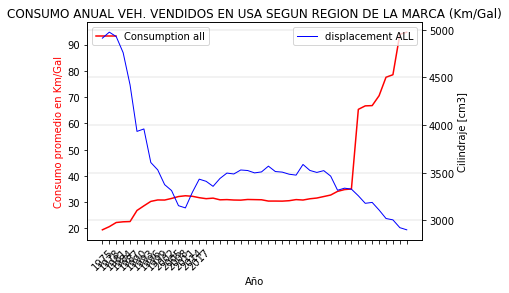

In [50]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x_axis, region['ALL'], 'r-', label = 'Consumption all')
ax2.plot(x_axis, cons['ALL'], 'b-', linewidth = 1, label = 'displacement ALL')

plt.title('CONSUMO ANUAL VEH. VENDIDOS EN USA SEGUN REGION DE LA MARCA (Km/Gal)')
plt.grid(color='gray', linestyle='-', linewidth=0.2)

ax1.set_xlabel('Año')
ax1.set_ylabel('Consumo promedio en Km/Gal', color = 'r')
ax2.set_ylabel('Cilindraje [cm3]', color = 'k')
ax1.set_xticklabels(x_axis[::3], rotation = '45')


ax2.legend()
ax1.legend()
plt.show()

# for line plotstyle check: https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html

In [54]:
len(cons['Model Year']) == len(region['Model Year'])

True